In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.num_examples

55000

In [10]:
mnist.test.num_examples

10000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

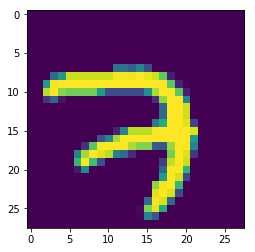

In [15]:
plt.imshow(mnist.train.images[0].reshape(28,28))

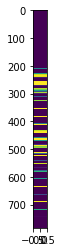

In [17]:
plt.imshow(mnist.train.images[0].reshape(784,1),aspect=0.02)

In [20]:
x = tf.placeholder(tf.float32, shape = [None, 784])#NOne = placeholder for batchsize

In [22]:
w = tf.Variable(tf.zeros([784, 10]))

Instructions for updating:
Colocations handled automatically by placer.


In [23]:
b = tf.Variable(tf.zeros([10]))

In [24]:
b.shape

TensorShape([Dimension(10)])

In [25]:
y = tf.matmul(x, w) + b

In [26]:
y_true = tf.placeholder(tf.float32, shape = [None, 10])

In [29]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [32]:
train = optimizer.minimize(cross_entropy)

In [33]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(10000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict={x:batch_x, y_true:batch_y})
        
    matches = tf.equal(tf.arg_max(y, 1), tf.argmax(y_true, 1))
    
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

Instructions for updating:
Use `tf.math.argmax` instead
0.9272


In [39]:
acc

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>